In [1]:
import os
import math
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from pyopenms import *
import numpy as np

In [2]:
def find_nearest_tol(array, value, tol):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    if (np.abs(array[idx] - value)).min() > tol:
        return -1,-1
    else:
        return array[idx],idx
    
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx],idx

In [3]:
parent = os.path.join('E:/','Sequence_Analysis','20230113 - 329-110 X6CX6CK 12ca5 vs MDM2') 
file_loc = os.path.join('E:/','Lumos_Data','20230113 - 329-110 X6CX6CK 12ca5 vs MDM2')
excel_name = 'EICs X6CX6CK 12ca5 vs MDM2.xlsx'

In [4]:
m_z_list = [557.266,919.3978,919.8975,467.4751,625.5827,571.9275,584.9335,906.3663,
           622.2896,622.6337,618.2984,619.3007,653.959]
RTs = [33,58,59,29,35,39,42,44,42,38,42,37,43]
tstart_list = [RT - 5 for RT in RTs]
tend_list = [RT + 5 for RT in RTs]
feature_RT = [round(((start + stop) / 2)*60,2) for start, stop in zip(tstart_list, tend_list)]

In [5]:
savedir = os.path.join(parent,"EICs")
smallsavedir = os.path.join(os.getcwd(),"EICs","Small")
if not os.path.exists(savedir):
    os.mkdir(savedir)
if not os.path.exists(smallsavedir):
    os.makedirs(smallsavedir)

In [6]:
scout_list = sorted(os.listdir(file_loc))
scout_files = []
for scout_name in scout_list:
    scout_files.append(os.path.join(file_loc,scout_name))
print(scout_files)

graph_list = scout_list
graph_names = [x[:-5] for x in graph_list]

['E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_12ca5_1.mzML', 'E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_12ca5_1.raw', 'E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_12ca5_2.mzML', 'E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_12ca5_2.raw', 'E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_12ca5_3.mzML', 'E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_12ca5_3.raw', 'E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_MDM2_1.mzML', 'E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_MDM2_1.raw', 'E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_MDM2_2.mzML', 'E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_MDM2_2.raw', 'E:/Lumos_Data\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\329-110_X6CX6CK_MDM2_3.mzML', 'E:/Lumos_Data\\20230113 - 329

In [7]:
RTs_full = []
ints_full = []
mzs_full = []
names = []
for file in scout_files:
    if file.endswith('.mzML'):
        print(file)
        names.append(file[:-5])
        exp = MSExperiment()
        MzMLFile().load(os.path.join(file),exp)
        RT_list_rep = []
        int_list_rep = []
        RTs = []
        mzs = []
        ints = []
        for spec in exp:
            RTs.append(spec.getRT())
            mzs_scan, ints_scan = spec.get_peaks()  
            mzs.append(mzs_scan)
            ints.append(ints_scan)
        RTs_full.append(RTs)
        ints_full.append(ints)
        mzs_full.append(mzs)    

E:/Lumos_Data\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\329-110_X6CX6CK_12ca5_1.mzML
E:/Lumos_Data\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\329-110_X6CX6CK_12ca5_2.mzML
E:/Lumos_Data\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\329-110_X6CX6CK_12ca5_3.mzML
E:/Lumos_Data\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\329-110_X6CX6CK_MDM2_1.mzML
E:/Lumos_Data\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\329-110_X6CX6CK_MDM2_2.mzML
E:/Lumos_Data\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\329-110_X6CX6CK_MDM2_3.mzML


In [8]:
RT_orig_list = [np.zeros(7) for i in m_z_list]
score_list = np.zeros(len(m_z_list))
p_scores = np.zeros(len(m_z_list))
time = 20
peak_range=30
decimal = 2
baseline = 1

In [9]:
os.path.join(savedir,excel_name)

'E:/Sequence_Analysis\\20230113 - 329-110 X6CX6CK 12ca5 vs MDM2\\EICs\\EICs X6CX6CK 12ca5 vs MDM2.xlsx'

In [10]:
# This block basically copies a target_file.csv into an editable Excel
workbook = xlsxwriter.Workbook(os.path.join(savedir,excel_name))
worksheet = workbook.add_worksheet()

557.266


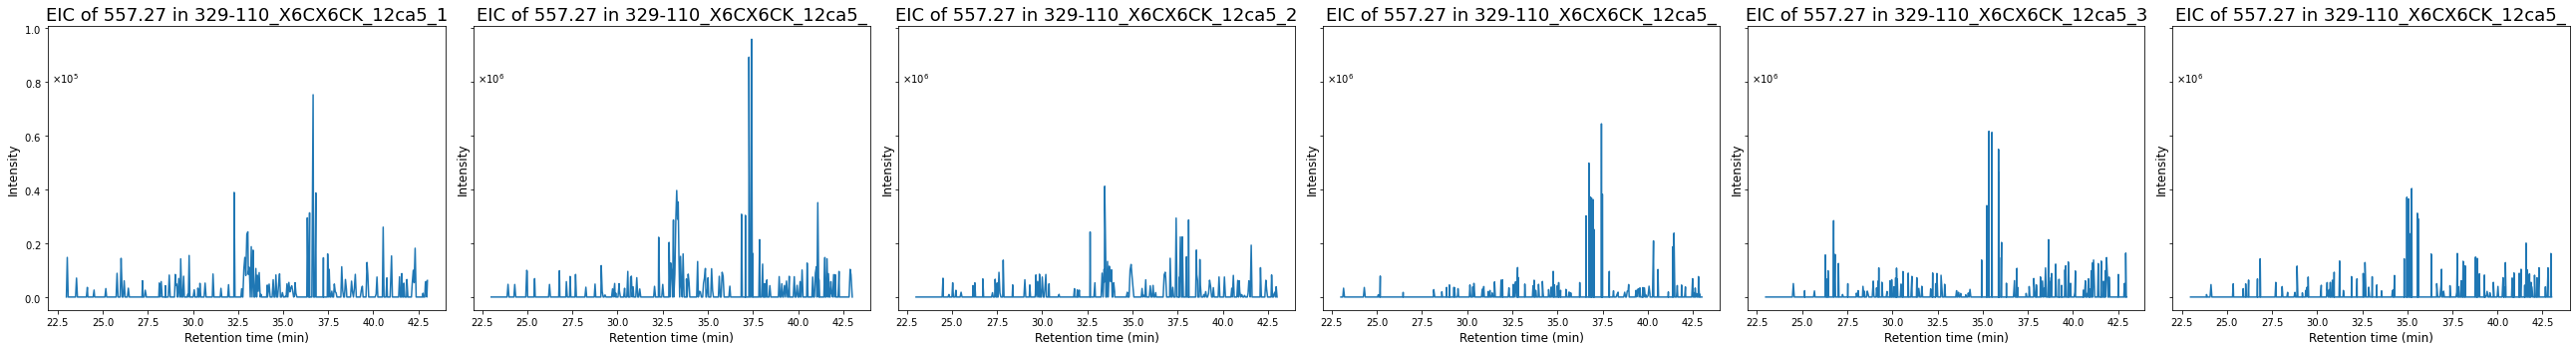

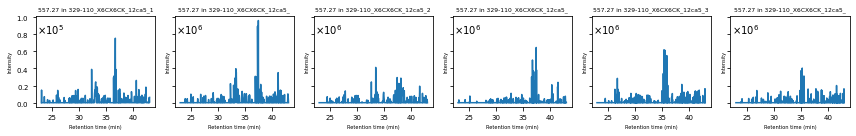

919.3978


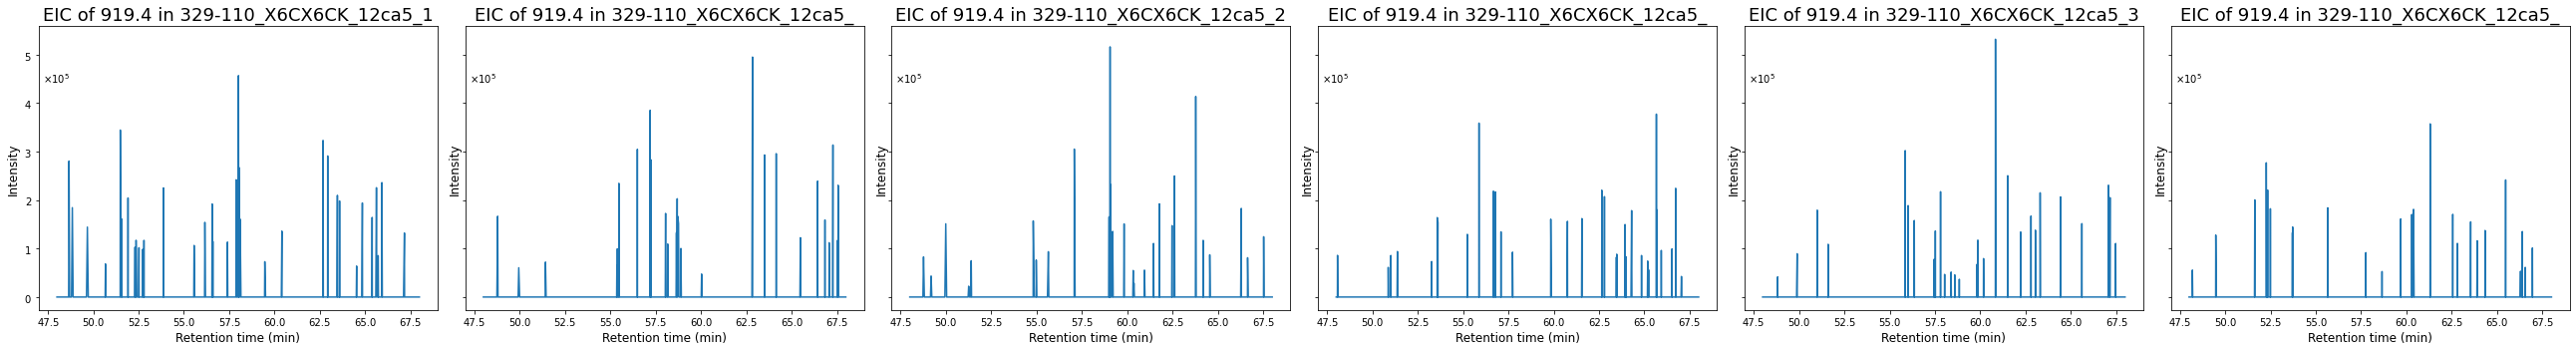

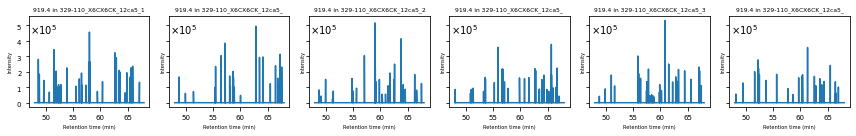

919.8975


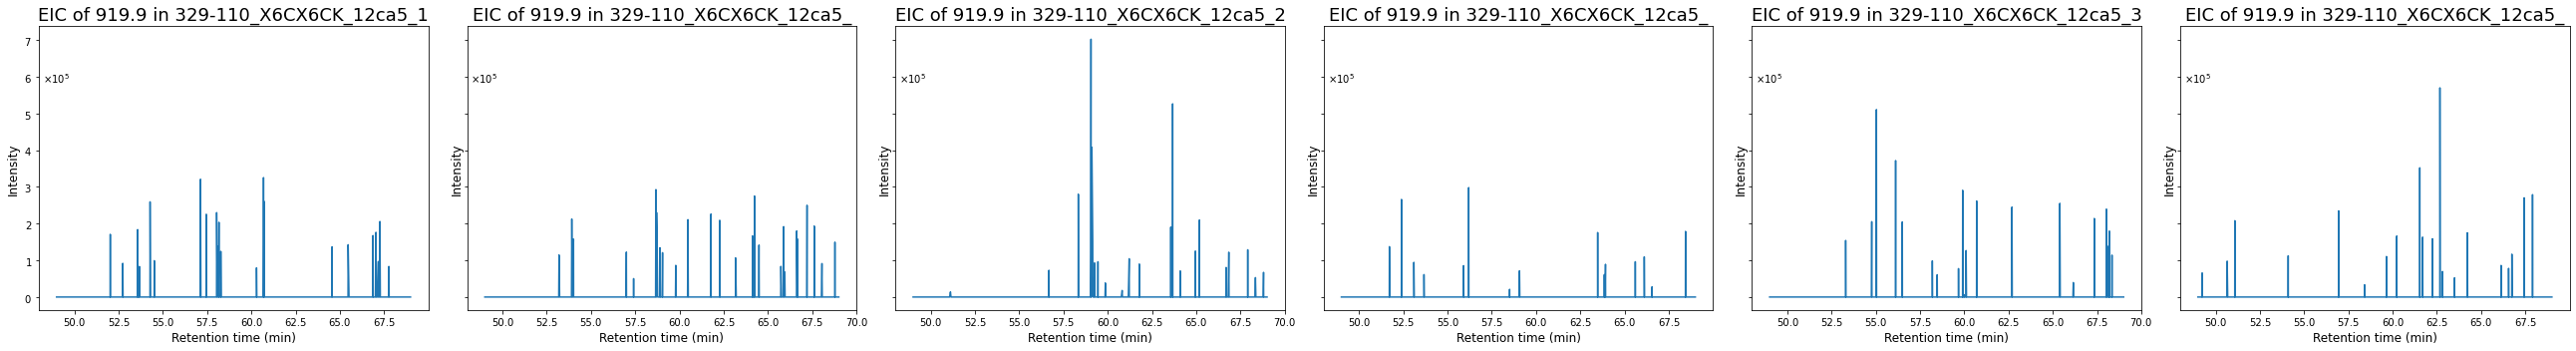

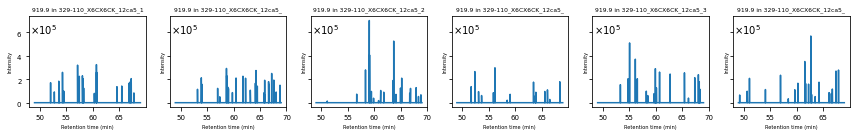

467.4751


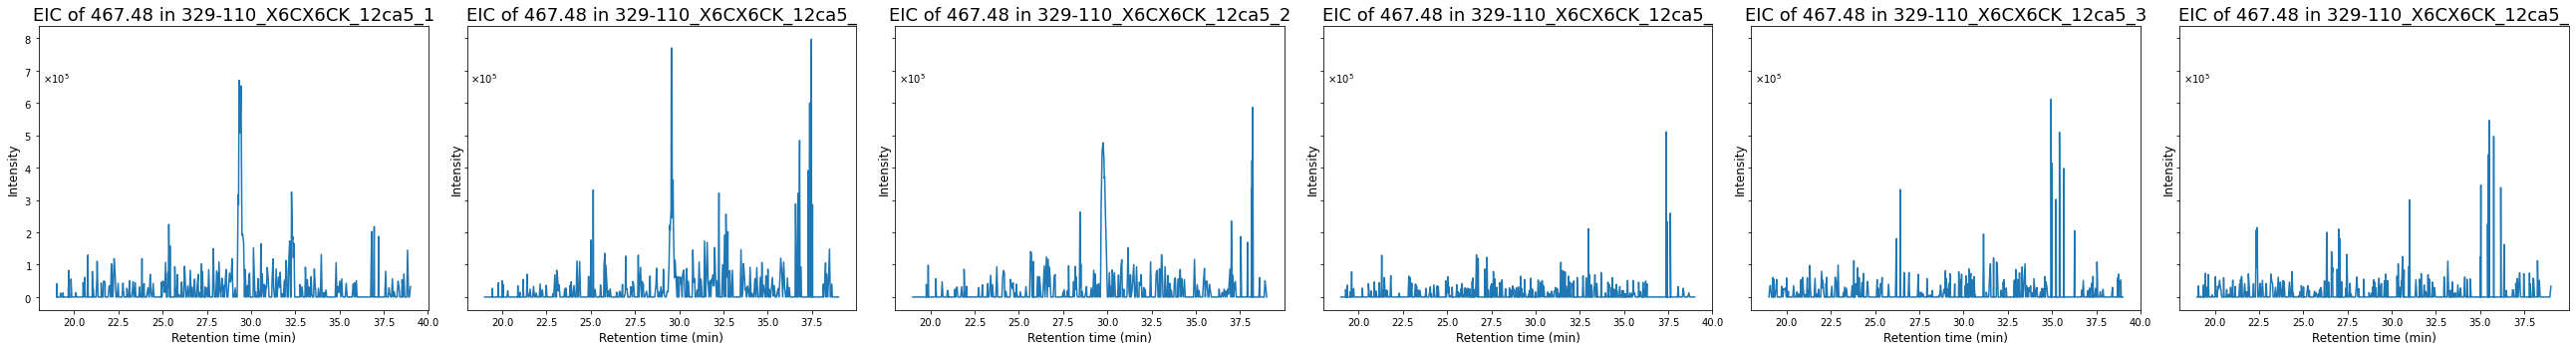

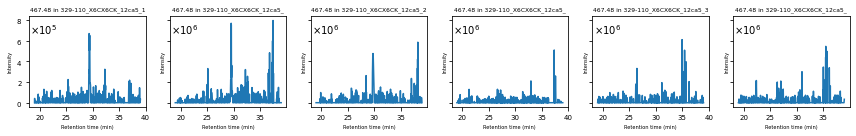

625.5827


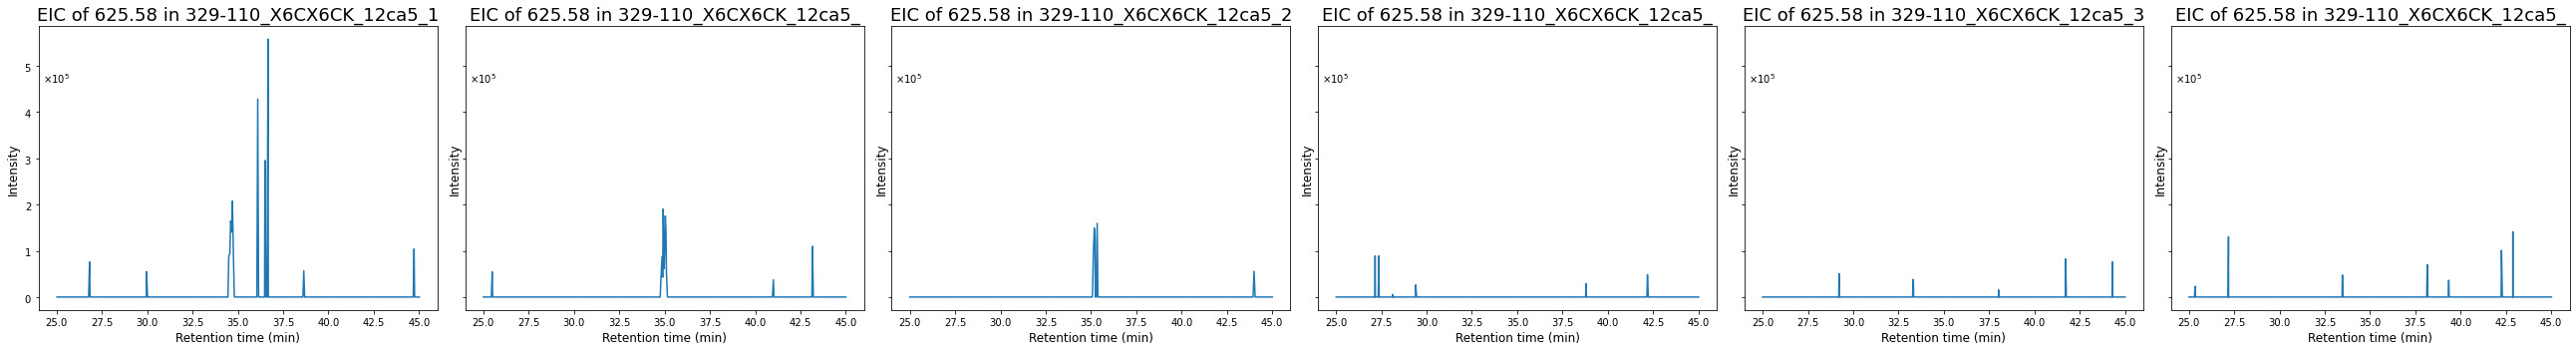

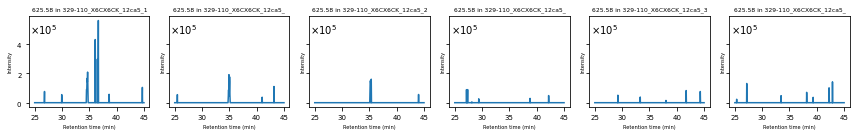

571.9275


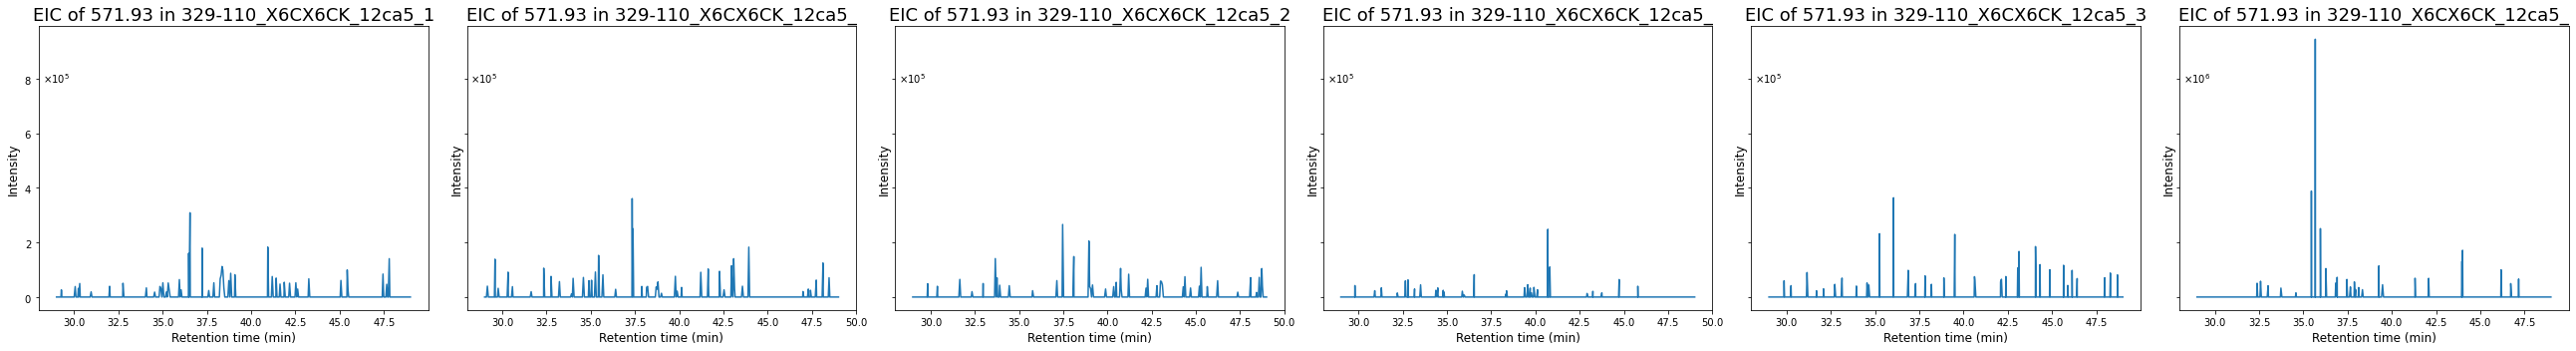

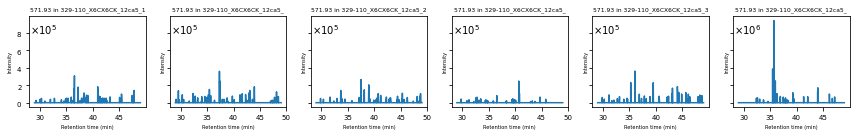

584.9335


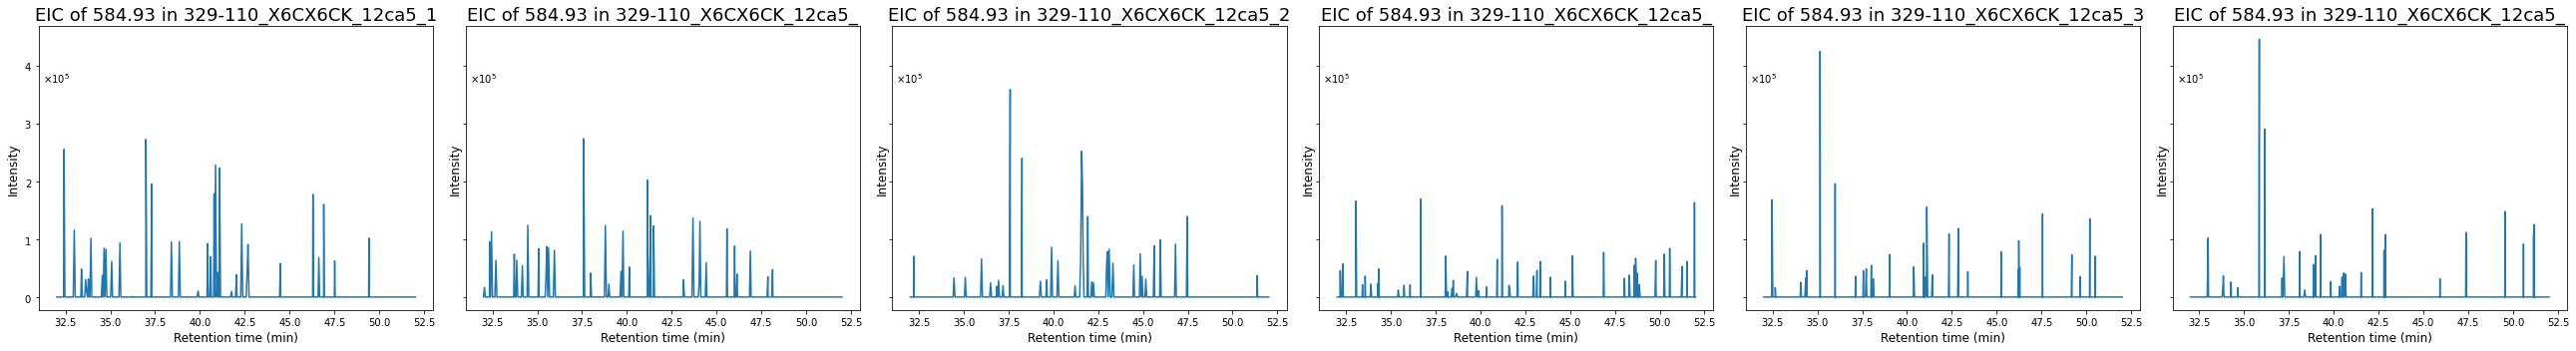

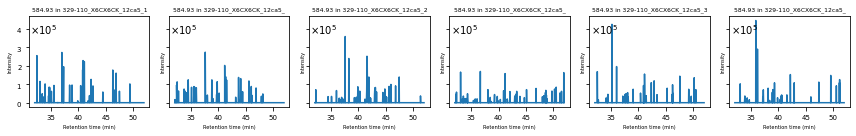

906.3663


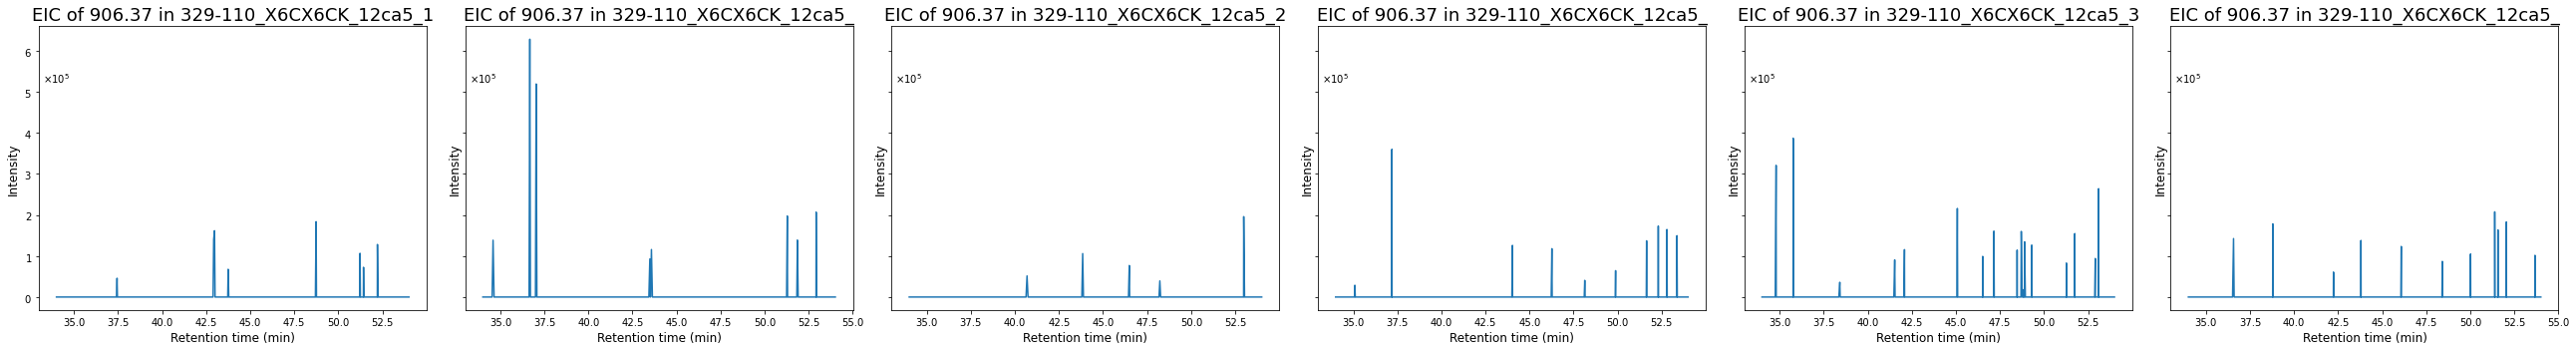

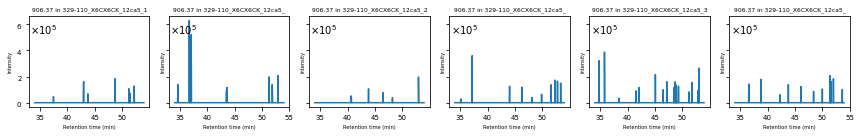

622.2896


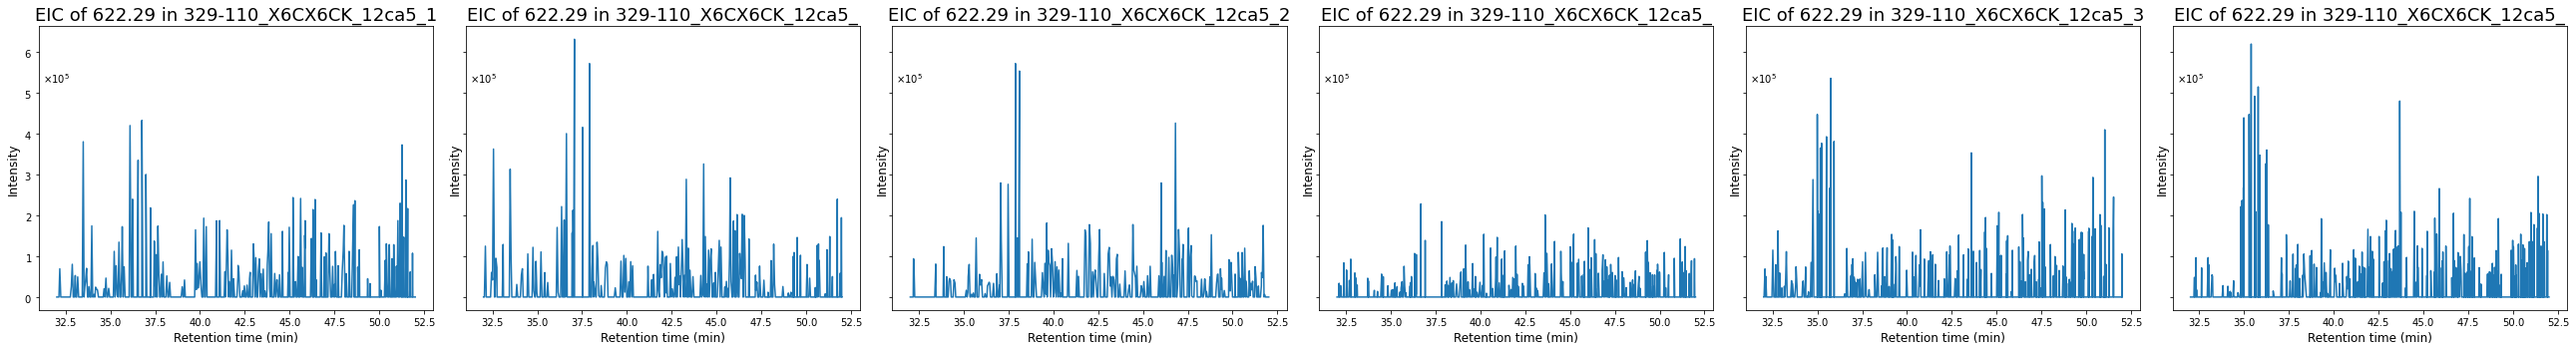

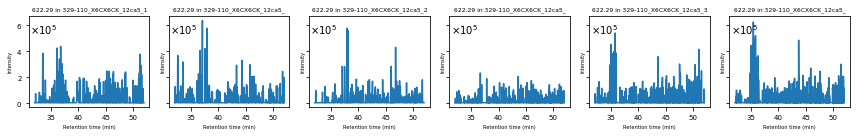

622.6337


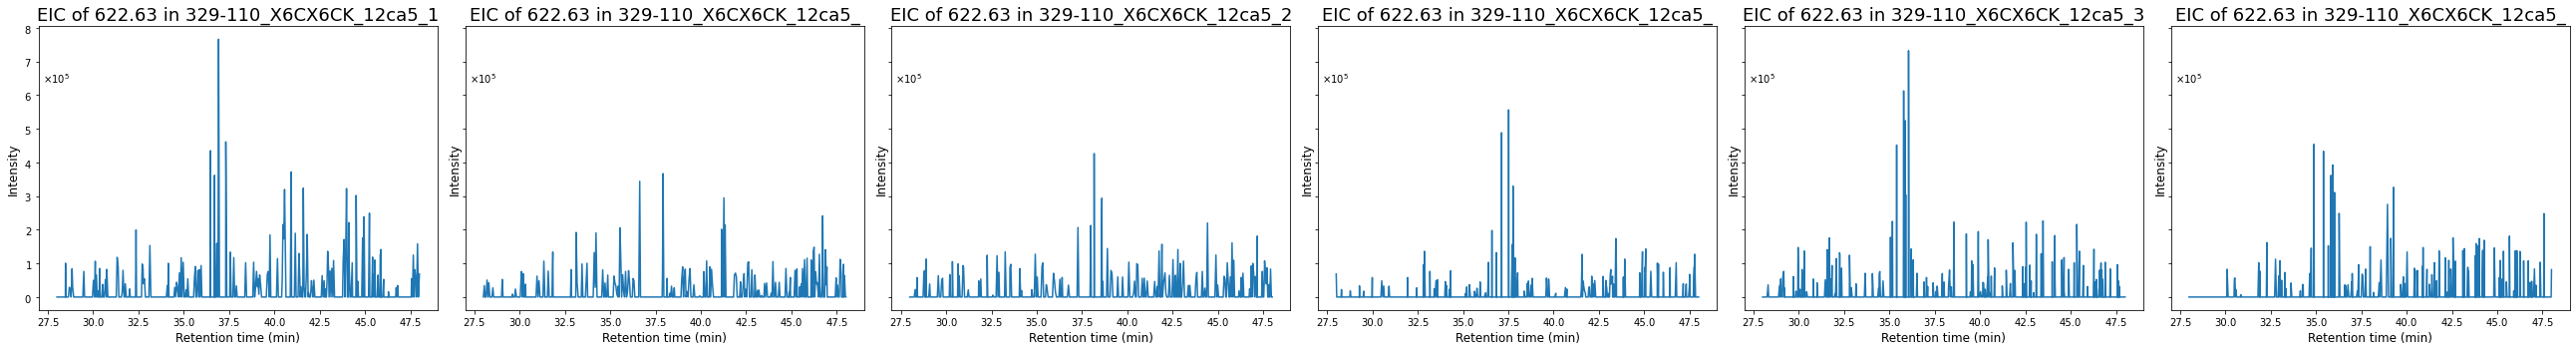

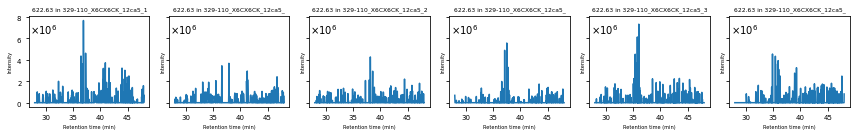

618.2984


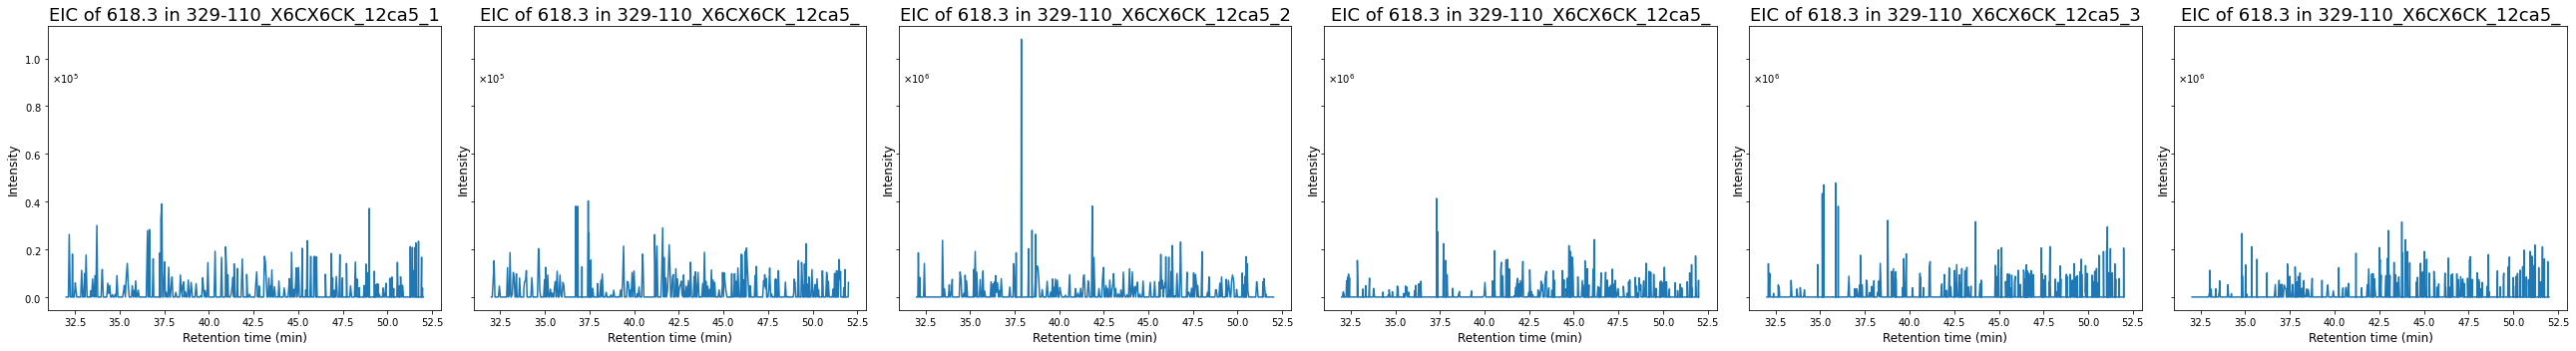

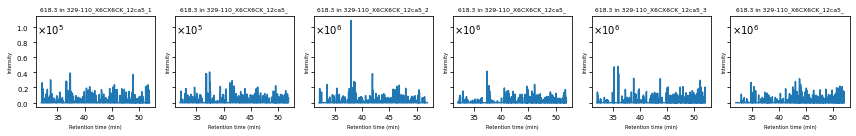

619.3007


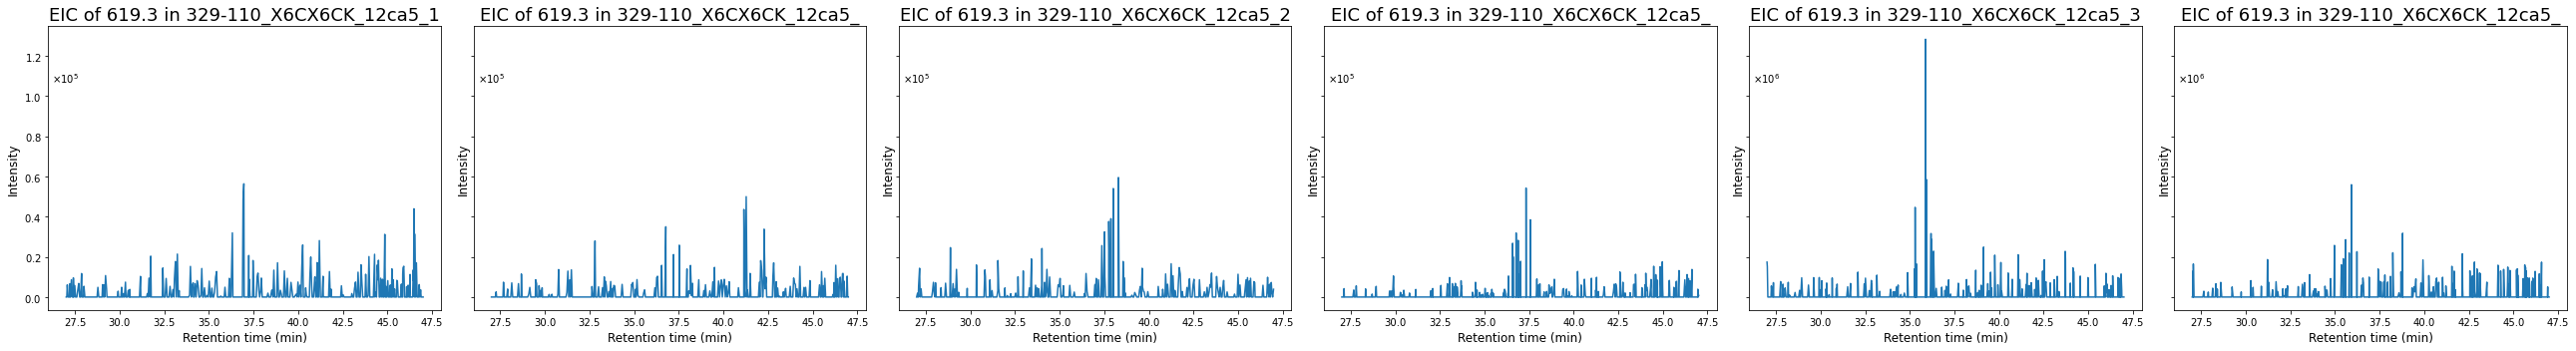

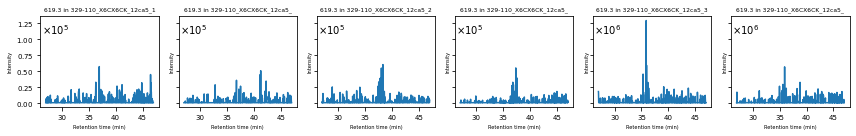

653.959


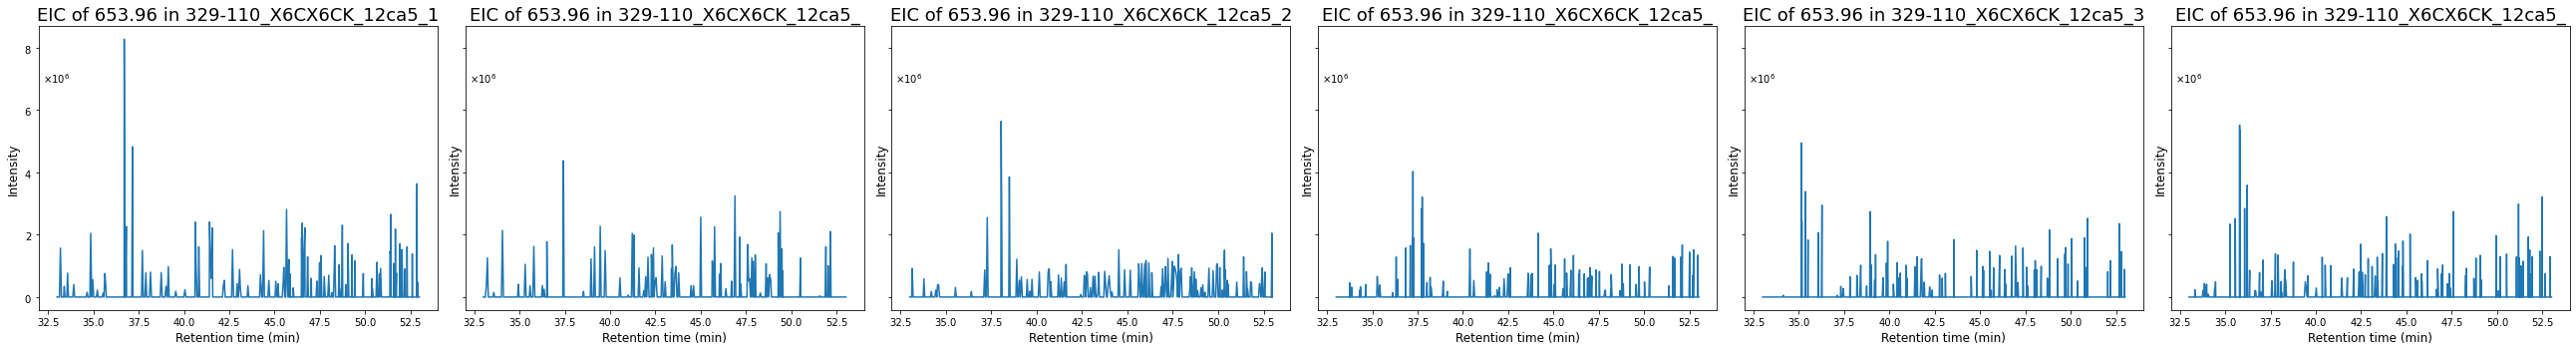

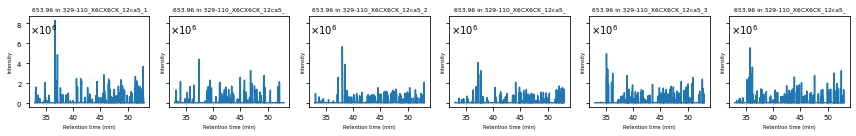

In [11]:
for j,mz in enumerate(m_z_list):       # loop through each feature
    print(mz)
    RT_feature = feature_RT[j]
    RT_origs = RT_orig_list[j]
    e_score = score_list[j]
    p_val = p_scores[j]
    xs = []
    xs_zoom = []
    ys = []
    max_array = []
    for k in range(len(RTs_full)):             # loop through each replicate
        RTs_rep = RTs_full[k]
        RT_orig = RT_origs[k]
        if RT_orig == 0:
            RT_orig = RT_feature
        ints_rep = ints_full[k]
        mzs_rep = mzs_full[k]

        RT_idx_low = find_nearest(RTs_rep,RT_orig-time/2*60)[1]
        RT_idx_high = find_nearest(RTs_rep,RT_orig+time/2*60)[1] 

        RTs_slice = RTs_rep[RT_idx_low:RT_idx_high+1]

        max_idx_low = find_nearest(RTs_slice,RT_orig-peak_range/2)[1]
        max_idx_high = find_nearest(RTs_slice,RT_orig+peak_range/2)[1]

        ints_slice = ints_rep[RT_idx_low:RT_idx_high+1]    # should take a slice of arrays for both of these
        mzs_slice = mzs_rep[RT_idx_low:RT_idx_high+1]
        mz_idx = [find_nearest_tol(entry,mz,10**(-decimal)/2)[1] for entry in mzs_slice] # find idx where the feature mz is in each scan

        ints_EIC = [array[mz_idx[o]] if mz_idx[o] > 0 else baseline for o,array in enumerate(ints_slice)]

        try:
            max_found = np.amax(ints_EIC[max_idx_low:max_idx_high])
        except ValueError:
            max_found = np.amax(ints_EIC)
            #print(ints_EIC[max_idx_low:max_idx_high],ints_EIC)
        max_array.append(max_found)
        xs.append(RTs_slice)
        xs_zoom.append(RTs_slice[max_idx_low:max_idx_high])
        ys.append(ints_EIC)

    #create the EIC as a regular figure to be saved and *probabaly* never looked at
    fig, axs = plt.subplots(1,int(len(names)),figsize=(6*len(names),5),sharey=True)
    for l in range(int(len(names))):
        x = [t/60 for t in xs[l]]
        y = ys[l]
        axs[l].plot(x,y)
        axs[l].set_title(f"EIC of {np.round(mz,decimal)} in {graph_names[l]}",fontsize=18)
        axs[l].set_xlabel('Retention time (min)',fontsize=12)
        axs[l].set_ylabel('Intensity',fontsize=12)
        yfmt = mticker.ScalarFormatter(useMathText=True)
        yfmt.set_powerlimits((3, 4))
        axs[l].yaxis.set_major_formatter(yfmt)
        axs[l].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        axs[l].get_yaxis().get_offset_text().set_visible(False)
        ax_max = max(axs[l].get_yticks())
        exponent_axis = np.floor(np.log10(ax_max)).astype(int)
        axs[l].annotate(r'$\times$10$^{%i}$'%(exponent_axis),
                     xy=(.01, .8), xycoords='axes fraction')
    plt.tight_layout()
    figname = f'EIC of mz of {np.round(mz,decimal)} at {np.round(RT_feature/60,1)}.png'
    plt.savefig(os.path.join(savedir,figname),dpi = 150)
    plt.show()

    #create the EIC as a small figure to be inserted into the Excel
    fig, axs = plt.subplots(1,int(len(names)),figsize=(2*len(names),2),sharey=True)
    for l in range(int(len(names))):
        x = [t/60 for t in xs[l]]
        y = ys[l]
        axs[l].plot(x,y)
        axs[l].set_title(f"{np.round(mz,decimal)} in {graph_names[l]}",fontsize=6)
        axs[l].set_xlabel('Retention time (min)',fontsize=5)
        axs[l].set_ylabel('Intensity',fontsize=5)
        yfmt = mticker.ScalarFormatter(useMathText=True)
        yfmt.set_powerlimits((3, 4))
        axs[l].yaxis.set_major_formatter(yfmt)
        axs[l].tick_params(axis='both', which='major', labelsize=7)
        axs[l].get_yaxis().get_offset_text().set_visible(False)
        ax_max = max(axs[l].get_yticks())
        exponent_axis = np.floor(np.log10(ax_max)).astype(int)
        axs[l].annotate(r'$\times$10$^{%i}$'%(exponent_axis),
                     xy=(.01, .8), xycoords='axes fraction')
    plt.tight_layout()
    fignamesmall = f'EIC of mz of {np.round(mz,decimal)} at {np.round(RT_feature/60,1)} small.png'
    plt.savefig(os.path.join(smallsavedir,fignamesmall),dpi = 150)
    plt.show()
    
    # Insert into Excel, after making the row bigger
    worksheet.set_row(j+1,150)
    worksheet.insert_image('H'+str(j+2),os.path.join(smallsavedir,fignamesmall),{'x_offset': 2, 'y_offset': 2})

In [12]:
workbook.close()